In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph = nx.Graph()
stop = 18
for node in range(1, stop+1):
    graph.add_node(node)

print(graph.nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [3]:
max_number = 2 * stop - 1
num = 1
squares = []
while num**2 <= max_number:
    squares.append(num**2)
    num = num + 1

print(squares)

[1, 4, 9, 16, 25]


In [4]:
for origin_vertex in graph.nodes:
    for destination_vertex in graph.nodes:
        if origin_vertex < destination_vertex:
            summation = origin_vertex + destination_vertex
            if summation in squares:
                graph.add_edge(origin_vertex, destination_vertex, label=str(summation))
                
print(graph.edges)
print(nx.is_connected(graph))

[(1, 3), (1, 8), (1, 15), (2, 7), (2, 14), (3, 6), (3, 13), (4, 5), (4, 12), (5, 11), (6, 10), (7, 9), (7, 18), (8, 17), (9, 16), (10, 15), (11, 14), (12, 13)]
True


In [5]:
def find_hamiltonian(graph, stop):
    """Heavily inspired by
    https://gist.github.com/mikkelam/ab7966e7ab1c441f947b
    """
    for start_node in graph.nodes:
        problem = [(graph, [start_node])]
        while problem:
            current_graph, trial_path = problem.pop()
            progress = []
            neighbors = (
                node
                for node in current_graph.neighbors(trial_path[-1])
                if node != trial_path[-1]
            )  # exclude self loops
            for neighbor in neighbors:
                progress_path = trial_path[:]  # creates a copy
                progress_path.append(neighbor)
                remaining_graph = nx.Graph(current_graph)
                remaining_graph.remove_node(trial_path[-1])
                progress.append((remaining_graph, progress_path))
            for remaining_graph, current_path in progress:
                if len(current_path) == stop:
                    hamiltonian = current_path
                    return hamiltonian
                problem.append((remaining_graph, current_path))
    return None

hamiltonian_path = find_hamiltonian(graph, stop)
print(hamiltonian_path)

None


In [7]:
adj_matrix = nx.adjacency_matrix(graph).todense()
deg_cent = nx.degree_centrality(graph)
eig_cent = nx.eigenvector_centrality_numpy(graph)  # more robust than regular ev centrality
print(deg_cent)
print(eig_cent)

{1: 0.1764705882352941, 2: 0.11764705882352941, 3: 0.1764705882352941, 4: 0.11764705882352941, 5: 0.11764705882352941, 6: 0.11764705882352941, 7: 0.1764705882352941, 8: 0.11764705882352941, 9: 0.11764705882352941, 10: 0.11764705882352941, 11: 0.11764705882352941, 12: 0.11764705882352941, 13: 0.11764705882352941, 14: 0.11764705882352941, 15: 0.11764705882352941, 16: 0.058823529411764705, 17: 0.058823529411764705, 18: 0.058823529411764705}
{1: 0.4767273392995517, 2: 0.014879428364748403, 3: 0.4872442702070472, 4: 0.10156867950993266, 5: 0.060492121367264, 6: 0.34572697525952995, 7: 0.01145370092193987, 8: 0.2588116207002902, 9: 0.006218126493393734, 10: 0.3011820848457223, 11: 0.03638290128065811, 12: 0.17113407359025984, 13: 0.28870058936853726, 14: 0.02247866279391159, 15: 0.3411152741306166, 16: 0.00272666438731406, 17: 0.11348955829963274, 18: 0.005022477178613185}


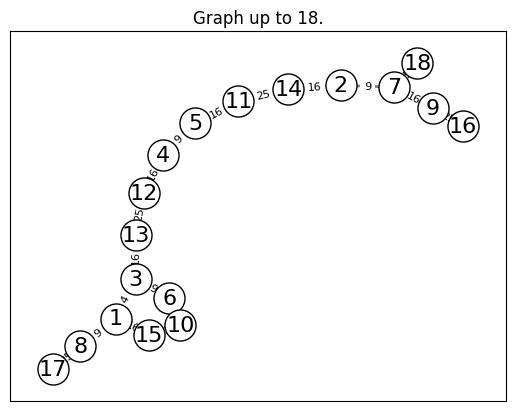

In [8]:
fig, ax = plt.subplots()
ax.set_title("Graph up to " + str(stop) +".")
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(
    graph,
    pos,
    node_size=500,
    node_color="white",
    linewidths=1,
    edgecolors="black",
)
nx.draw_networkx_labels(
    graph,
    pos,
    font_size=16,
    font_family="sans-serif",
)
nx.draw_networkx_edges(
    graph,
    pos,
    width=2,
    alpha=0.5,
    edge_color="black",
)
nx.draw_networkx_edge_labels(
    graph,
    pos,
    nx.get_edge_attributes(graph, "label"),
    font_size=8,
)
plt.show()